In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,auc


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y=pd.Series(data.target)


In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc=StandardScaler()
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
#BAse estimator: Decision Tree
base_tree = DecisionTreeClassifier(random_state=42)

#Bagging Classifier

Bagging_clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=100,
    bootstrap=True,
    random_state=42

)
Bagging_clf.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [6]:
y_pred = Bagging_clf.predict(X_test_scaled)

In [7]:
accuracy_score= accuracy_score(y_test, y_pred)
accuracy_score

0.956140350877193

In [8]:
classifi_report = classification_report(y_test, y_pred)
print(classifi_report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



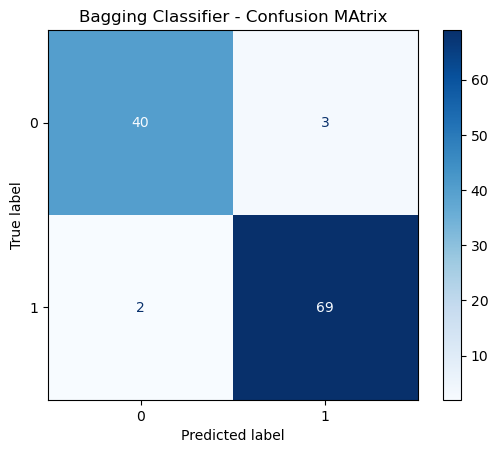

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Confusion MAtrix
cm= confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Bagging_clf.classes_)
disp.plot(cmap='Blues')
plt.title('Bagging Classifier - Confusion MAtrix')
plt.show()

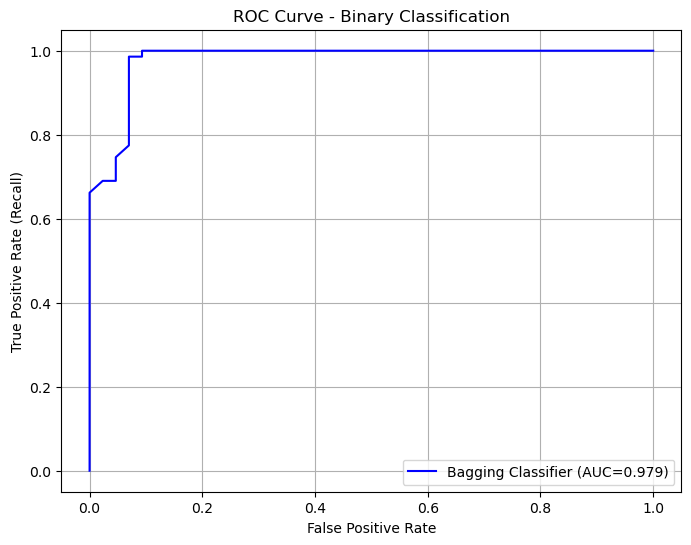

In [17]:
#Compute ROC Value
y_scores = Bagging_clf.predict_proba(X_test_scaled)[:, 1] # Get the probability of the positive class
fpr,tpr,threshold =roc_curve(y_test, y_scores)
auc_score=roc_auc_score(y_test,y_scores)
#Plot

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"Bagging Classifier (AUC={auc_score:.3f})",color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Binary Classification")
plt.legend()
plt.grid()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)

#Fit and predict


rf_clf.fit(X_train_scaled,y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print("Accuracy (Random Forest): ",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


Accuracy (Random Forest):  0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



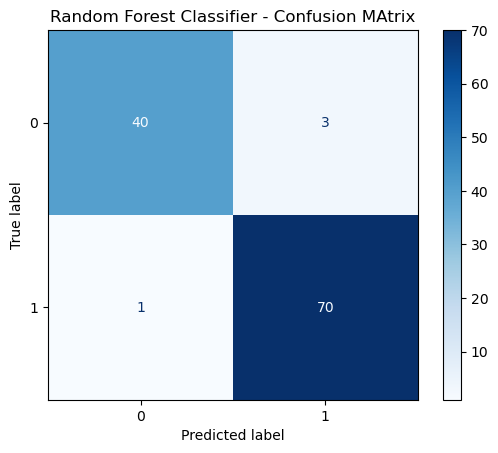

In [22]:
#Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(cmap='Blues')  
plt.title('Random Forest Classifier - Confusion MAtrix')
plt.show()

In [28]:
y_scores_rf = rf_clf.predict_proba(X_test_scaled)[:, 1] 
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


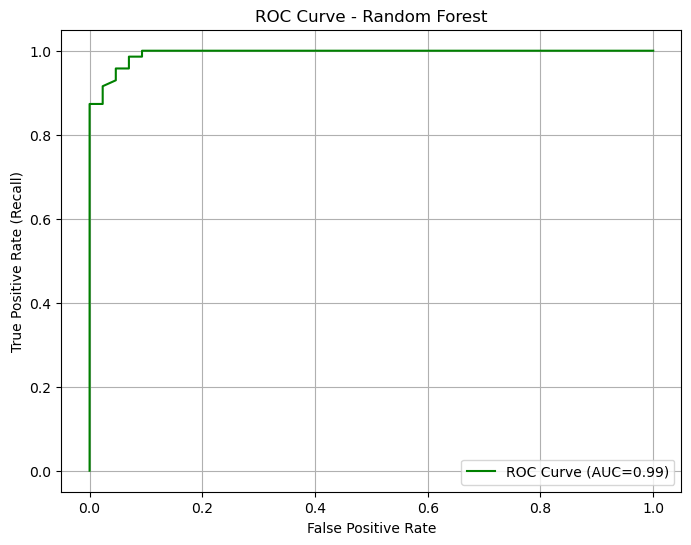

In [30]:
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC={roc_auc_rf:.2f})", color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")  
plt.legend()
plt.grid(True)
plt.show()

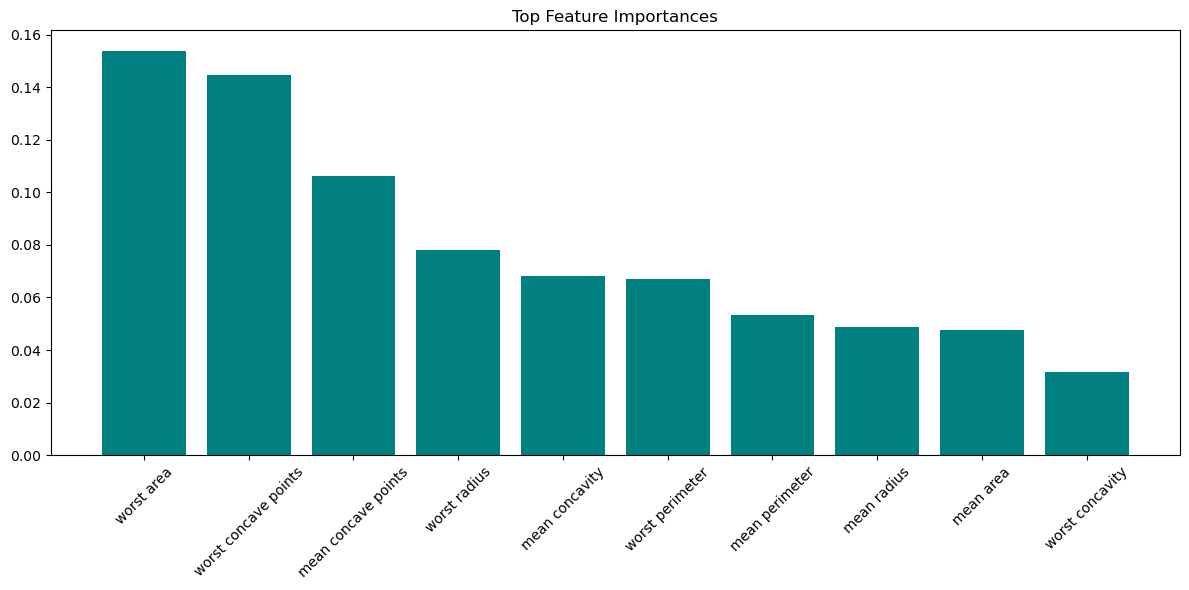

In [31]:
#Feature Importance
importances = rf_clf.feature_importances_
indices=np.argsort(importances)[::-1]


#Plot
plt.figure(figsize=(12,6))
plt.title("Top Feature Importances")
plt.bar(range(10),importances[indices[:10]],color='teal',align='center')
plt.xticks(range(10),X.columns[indices[:10]],rotation=45)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.ensemble import GradientBoostingClassifier


In [33]:
#Grading Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,random_state=42)


In [34]:
#Fit and predict
gb_clf.fit(X_train_scaled, y_train)
y_pred_gb= gb_clf.predict(X_test_scaled)

print("Accurarcy (Gradient Boosting): ",accuracy_score(y_test,y_pred_gb))
print(classification_report(y_test,y_pred_gb))


Accurarcy (Gradient Boosting):  0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



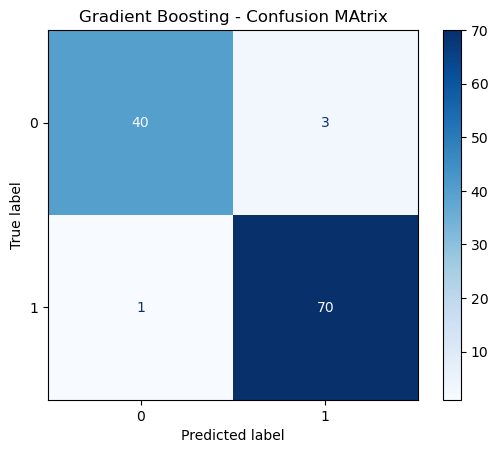

In [35]:
#Confusion Matrix for Gradient Boosting
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot(cmap='Blues')  
plt.title('Gradient Boosting - Confusion MAtrix')
plt.show()

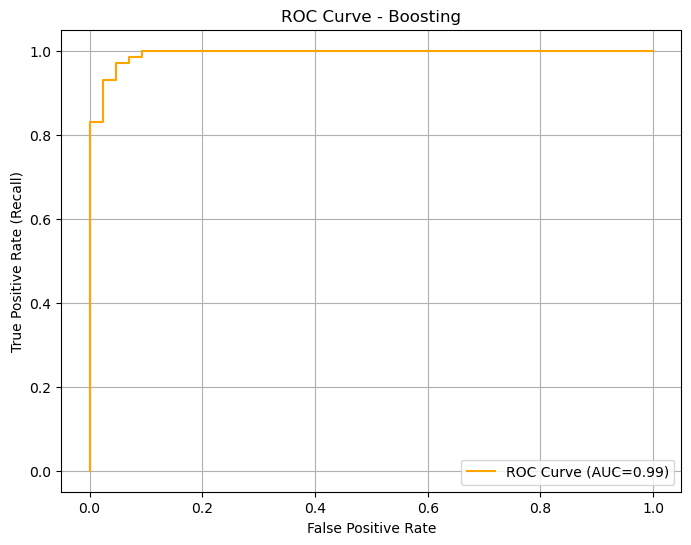

In [38]:
y_scores_rf = gb_clf.predict_proba(X_test_scaled)[:, 1] 
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC={roc_auc_rf:.2f})", color='orange')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Boosting")  
plt.legend()
plt.grid(True)
plt.show()